In [1]:
import pandas as pd

# Load the uploaded Excel file
file_path = "Students_Form_Status.xlsx"
df = pd.ExcelFile(file_path)

# Show sheet names
df.sheet_names


['Sheet1', 'Evidance']

In [2]:
# Load both sheets
sheet1 = pd.read_excel(file_path, sheet_name="Sheet1")
evidance = pd.read_excel(file_path, sheet_name="Evidance")

# Show first rows of both to understand structure
sheet1.head(), evidance.head()



(                              Name Phone Number Assigned Group  \
 0              Ahmed Mostafa Lotfy   1503839296           D 80   
 1        Esraa Mohamed Saeed Abbas   1022633460           D 80   
 2  Mostafa Amr Amin Mosallam Naiem   1012298441           D 80   
 3     Ahmed Mustafa Saeed Muhammad   1149444834           D 80   
 4              Tamer Atta Elwakeel   1144447749           D 82   
 
                  Track Name  Form Status Follow Up Evidence Attachment  
 0  Embedded Systems Diploma  ✅ Submitted       NaN                 NaN  
 1  Embedded Systems Diploma  ✅ Submitted       NaN                 NaN  
 2  Embedded Systems Diploma  ✅ Submitted       NaN                 NaN  
 3  Embedded Systems Diploma  ✅ Submitted       NaN                 NaN  
 4  Embedded Systems Diploma  ✅ Submitted       NaN                 NaN  ,
                                     Name Phone Number  \
 0        Mohamed Abdelhakam Sarwat Eladl   1008935190   
 1             Bishoy Ayman Kareem 

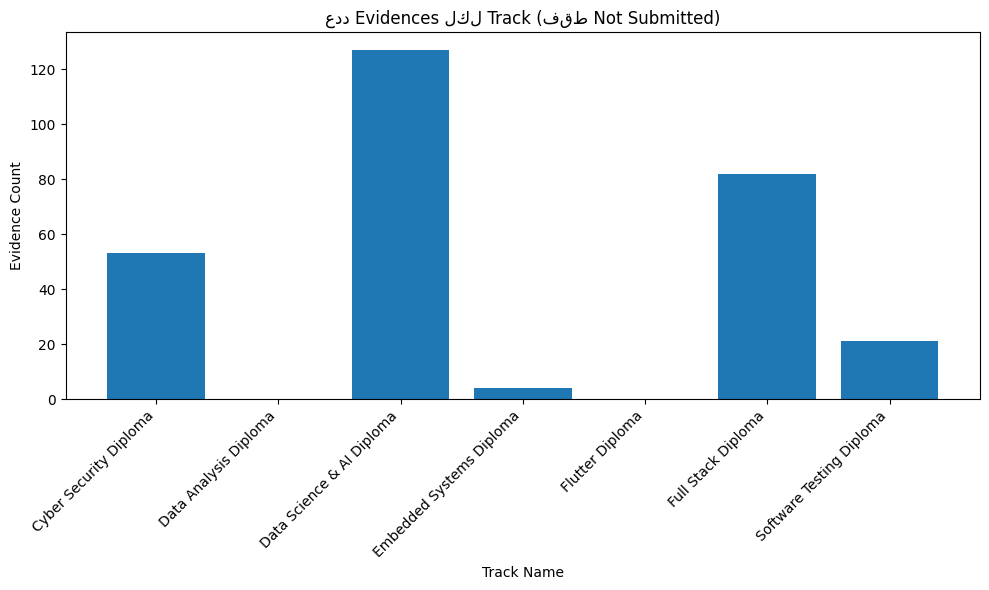

,Track Name,Evidence Attachment
0,Cyber Security Diploma,53
1,Data Analysis Diploma,0
2,Data Science & AI Diploma,127
3,Embedded Systems Diploma,4
4,Flutter Diploma,0
5,Full Stack Diploma,82
6,Software Testing Diploma,21


In [3]:
# نركز على sheet1 لأنه فيه الأعمدة المطلوبة: Track Name, Form Status, Evidence Attachment

# نرشح الحالات اللي Form Status فيها Not Submitted
not_submitted = sheet1[sheet1["Form Status"].str.contains("Not Submitted", case=False, na=False)]

# نحسب كام Evidence لكل Track
dashboard = not_submitted.groupby("Track Name")["Evidence Attachment"].count().reset_index()

import matplotlib.pyplot as plt

# نرسم Dashboard بسيط
plt.figure(figsize=(10,6))
plt.bar(dashboard["Track Name"], dashboard["Evidence Attachment"])
plt.xticks(rotation=45, ha="right")
plt.title("عدد Evidences لكل Track (فقط Not Submitted)")
plt.xlabel("Track Name")
plt.ylabel("Evidence Count")
plt.tight_layout()
plt.show()

dashboard
